In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd


In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [4]:
data = pd.read_csv('C:/Users/marce/Documents/interpromo 2020/All Data/SEATGURU_INFO_AIRCRAFT.csv')
df = pd.DataFrame.from_csv('C:/Users/marce/Documents/interpromo 2020/All Data/SEATGURU_INFO_AIRCRAFT.csv', encoding='utf-8', sep=";")
dfetud = df[6000:7000]
dfetud


C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,Recline,...,Width,Bedlength_maximum,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating
Data_Source,,,,,,,,,,,,,,,,,,,,,
SeatGuru,klm,Embraer ERJ-190,ECONOMY,short haul,56,100,Economy,STANDARD,EXIT_ROW,NaN,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,5
SeatGuru,klm,Embraer ERJ-190,ECONOMY,short haul,56,100,Economy,STANDARD,NORMAL,NaN,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3
SeatGuru,klm,Embraer ERJ-190,BUSINESS,short haul,36,100,Europe Business,STANDARD,NORMAL,NaN,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3
SeatGuru,klm,Embraer ERJ-190,ECONOMY,short haul,8,100,Economy Comfort,STANDARD,NORMAL,NaN,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3
SeatGuru,korean-air,Airbus 380-800 V2,FIRST,long haul,12,399,First Class,OPEN_SUITE,BULKHEAD,NaN,...,26.5,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,NONE,NaN,3
SeatGuru,korean-air,Airbus 380-800 V2,BUSINESS,long haul,94,399,Prestige,FLAT_BED,NORMAL,NaN,...,21.0,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,NONE,NaN,3
SeatGuru,korean-air,Airbus 380-800 V2,BUSINESS,long haul,94,399,Prestige,FLAT_BED,BULKHEAD,NaN,...,21.0,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,NONE,NaN,2
SeatGuru,korean-air,Airbus 380-800 V2,FIRST,long haul,12,399,First Class,OPEN_SUITE,NORMAL,NaN,...,26.5,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,NONE,NaN,3
SeatGuru,korean-air,Airbus 380-800 V2,BUSINESS,long haul,94,399,Prestige,FLAT_BED,EXIT_ROW,NaN,...,21.0,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,NONE,NaN,5


In [5]:
dfetud['Aircraft_Type'] = (dfetud['Aircraft_Type'].str.replace(r' ', '_'))
dfetud['Aircraft_Type'] 

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Data_Source
SeatGuru      Embraer_ERJ-190
SeatGuru      Embraer_ERJ-190
SeatGuru      Embraer_ERJ-190
SeatGuru      Embraer_ERJ-190
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru    Airbus_380-800_V2
SeatGuru      Airbus_A330-200
SeatGuru      Airbus_A330-200
SeatGuru      Airbus_A330-200
SeatGuru      Airbus_A330-200
SeatGuru      Airbus_A330-200
SeatGuru      Airbus_A330-200
SeatGuru      Airbus_A330-200
SeatGuru      Airbus_A330-200
SeatGuru      Airbus_A330-200
SeatGuru      Airbus_A330-200
SeatGuru      Airbus_A330-300
SeatGuru      Airbus_A330-300
SeatGuru      Airbus_A330-300
                  ...        
SeatGuru           Boeing_787
SeatGuru           Boeing_78

In [6]:
dfetud['nom'] = dfetud['Airline_name'].str.cat(dfetud['Aircraft_Type'],sep="_")
dfetud['nom']

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Data_Source
SeatGuru             klm_Embraer_ERJ-190
SeatGuru             klm_Embraer_ERJ-190
SeatGuru             klm_Embraer_ERJ-190
SeatGuru             klm_Embraer_ERJ-190
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru    korean-air_Airbus_380-800_V2
SeatGuru      korean-air_Airbus_A330-200
SeatGuru      korean-air_Airbus_A330-200
SeatGuru      korean-air_Airbus_A330-200
SeatGuru      korean-air_Airbus_A330-200
SeatGuru      korean-air_Airbus_A330-200
SeatGuru      korean-air_Airbus_A330-200
SeatGuru      korean-air_Airbus_A330-200
Seat

In [7]:
list__type = dfetud['nom'].unique()
list__type
len(list__type)

107

In [8]:
import os
listeall=os.listdir('C:/Users/marce/Documents/interpromo 2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU')
len(listeall)
listeall

['Aegean_Airlines_Airbus_A319-100_plane1.svg.png',
 'Aegean_Airlines_Airbus_A320-200_plane2.svg.png',
 'Aegean_Airlines_Airbus_A321-200_plane1.svg.png',
 'Aegean_Airlines_Airbus_A321-200_plane3.svg.png',
 'Aegean_Airlines_ATR_42-600_plane2.svg.png',
 'Aegean_Airlines_ATR_42-600_plane4.svg.png',
 'Aegean_Airlines_Bombardier_Dash_8_Q400_plane3.svg.png',
 'Aegean_Airlines_Bombardier_Dash_8_Q400_plane5.svg.png',
 'Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A320_plane7.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A320_V2_plane8.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A321_plane9.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A321_V2_plane10.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A321_V3_plane11.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A330_300_V2_plane4.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A330_300_V3_plane5.jpg',
 'Aeroflot_Russian_Airlines_Boeing_737-800_plane12.svg.png',
 'Aeroflot_Russian_Airlines_Boeing_777-300ER_plane6.jpg',
 'Aeroflot_Russia

In [31]:
import re
results=[]
for x in list__type :
    pattern = re.compile("x")
for texte in listeall:
     if pattern.search(texte):
            #print ("%s" % texte)
        results.append(texte)
results = list(set(results))
results

['AeroMexico_Boeing_737-700_V2_plane21.jpg',
 'Hainan_Airlines_Boeing_737_Max_8_plane473.svg.png',
 'Sunwing_Airlines_Boeing_737_Max_8_plane877.svg.png',
 'AeroMexico_Boeing_737-800_B_plane22.svg.png',
 'AeroMexico_Embraer_ERJ-170_plane24.jpg',
 'Norwegian_Air_Shuttle_Boeing_737_Max_8_plane678.svg.png',
 'Southwest_Airlines_Boeing_737_Max_8_plane851.svg.png',
 'WestJet_Boeing_737_Max_8_plane334.svg.png',
 'Qatar_Airways_Airbus_A321_182pax_plane747.svg.png',
 'Icelandair_Boeing_737_Max_8_plane505.svg.png',
 'AeroMexico_Boeing_737-800_C_plane23.jpg',
 'AeroMexico_Boeing_787-9_plane19.jpg',
 'Iberia_Airbus_A320_Express_plane497.jpg',
 'American_Airlines_Boeing_737_Max_8_plane177.svg.png',
 'Regional_Express_SAAB_340B_plane749.jpg',
 'Air_India_Express_Boeing_737-800_V2_plane104.jpg',
 'AeroMexio_Boeing_787-8_plane18.jpg',
 'AeroMexico_Embraer_ERJ-190_plane25.jpg',
 'Qatar_Airways_Airbus_A321_196pax_plane748.svg.png',
 'Aeromexico_AM_Boeing_737_MAX_8_plane20.svg.png',
 'SilkAir_Boeing_737_

In [ ]:
#Aeromexico_AM_Boeing_737_MAX_8_plane20.svg.png = sièges annotés ; 3 classes ; 184 sièges ; 8 sorties (avant-milieu-arrière); 3 toilettes ; 2 vestiaires ; 1 bar ; carac pr sièges = y ; même nbre siege = n ; 
#AeroMexico_Boeing_737-700_V2_plane21.jpg  
#AeroMexico_Boeing_737-800_B_plane22.svg.png
#AeroMexico_Boeing_737-800_C_plane23.jpg
#AeroMexico_Boeing_787-9_plane19.jpg
#AeroMexico_Embraer_ERJ-170_plane24.jpg
#AeroMexico_Embraer_ERJ-190_plane25.jpg
#AeroMexico_Embraer_ERJ-190_V2_plane26.jpg
#AeroMexio_Boeing_787-8_plane18.jpg
#Air_India_Express_Boeing_737-800_V2_plane104.jpg
#American_Airlines_Boeing_737_Max_8_plane177.svg.png
#Hainan_Airlines_Boeing_737_Max_8_plane473.svg.png
#Iberia_Airbus_A320_Express_plane497.jpg
#Icelandair_Boeing_737_Max_8_plane505.svg.png
#Norwegian_Air_Shuttle_Boeing_737_Max_8_plane678.svg.png
#Qatar_Airways_Airbus_A321_182pax_plane747.svg.png
#Qatar_Airways_Airbus_A321_196pax_plane748.svg.png
#Regional_Express_SAAB_340B_plane749.jpg
#SilkAir_Boeing_737_Max_8_plane823.svg.png
#Southwest_Airlines_Boeing_737_Max_8_plane851.svg.png
#Sunwing_Airlines_Boeing_737_Max_8_plane877.svg.png
#WestJet_Boeing_737_Max_8_plane334.svg.png

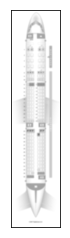

In [3]:
#pattern matching - jet 1
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('C:/Users/marce/Documents/interpromo 2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_A321_V3_plane11.jpg', 0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()

In [9]:
#reconnaissance sièges
import cv2
import numpy as np

img_rgb = cv2.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg',0)
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
#cv2.imshow('first',img_rgb)
#cv2.waitKey(0)
#gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) - si image en couleur.

template = cv2.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/temp_normal_seat.jpg',0)
w, h = template.shape[::-1]
res=cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
sin_val, max_val, min_loc, max_loc=cv2.minMaxLoc(res)
top_left=max_loc
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#on augmente les limites du rectangle de reconnaissance de 50 pixels
#bottom_right=(top_left[0]+40,top_left[1]+40)
#cv2.rectangle(res, top_left, bottom_right, (0,255,0),5)

cv2.imshow('object found',img_rgb)
cv2.waitKey(0)

#Observation : template à revoir, le contour blanc autour du siège dans le template ne permet pas la bonne reconnaissance de l'élément siège sur l'image.

-1

In [8]:
import cv2
import numpy as np

img_rgb = cv2.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg',0)
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
#cv2.imshow('first',img_rgb)
#cv2.waitKey(0)

template = cv2.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/templateTest.jpg',0)
w, h = template.shape[::-1]
res=cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
sin_val, max_val, min_loc, max_loc=cv2.minMaxLoc(res)
top_left=max_loc
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#on augmente les limites du rectangle de reconnaissance de 50 pixels
#bottom_right=(top_left[0]+40,top_left[1]+40)
#cv2.rectangle(res, top_left, bottom_right, (0,255,0),5)

cv2.imshow('object found',img_rgb)
cv2.waitKey(0)

-1

In [4]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import glob
import cv2
 
# charger le template, convertir en nuances de gris, détecter les bords
template = cv2.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/temp_restau.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2.imshow("Template", template)
cv2.waitKey(0)

-1

In [17]:
# Python program to illustrate 
# multiscaling in template matching 
import cv2 
import numpy as np 
import imutils

# Read the main image 
img_rgb = cv2.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg',0)

# Convert to grayscale 
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 

# Read the template 
template = cv2.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/templateTest.jpg',0)

# Store width and height of template in w and h 
w, h = template.shape[::-1] 
found = None

for scale in np.linspace(0.2, 1.0, 20)[::-1]: 

# resize the image according to the scale, and keep track 
# of the ratio of the resizing 
    resized=imutils.resize(img_rgb, width = int(img_rgb.shape[1] * scale)) 
    r = img_rgb.shape[1] / float(resized.shape[1]) 

# if the resized image is smaller than the template, then break 
# from the loop 
# detect edges in the resized, grayscale image and apply template 
# matching to find the template in the image edged 
# = cv2.Canny(resized, 50, 200) result = cv2.matchTemplate(edged, template, 
# cv2.TM_CCOEFF) (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result) 
# if we have found a new maximum correlation value, then update 
# the found variable if found is None or maxVal > found[0]: 
#    if resized.shape[0] < h or resized.shape[1] < w: 
#        break
#    found = (maxVal, maxLoc, r) 

# unpack the found varaible and compute the (x, y) coordinates 
# of the bounding box based on the resized ratio 
(_, maxLoc, r) = found 
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r)) 
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r)) 

# draw a bounding box around the detected result and display the image 
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2) 
cv2.imshow("Image", image) 
cv2.waitKey(0) 


TypeError: 'NoneType' object is not iterable

In [6]:
# Python code for Background subtraction using OpenCV 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
  
img_rgb = cv2.VideoCapture('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/image2.png',0)
fgbg = cv2.createBackgroundSubtractorMOG2() 
  
while(1): 
    ret, frame = img_rgb.read() 
  
    fgmask = fgbg.apply(frame)   
    cv2.imshow('fgmask', frame) 
    cv2.imshow('frame', fgmask) 
  
      
    k = cv2.waitKey(11) & 0xff
    if k == 10: 
        break
      
    
img_rgb.release() 
cv2.destroyAllWindows() 

#OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#ça marche pas. l'image n'a pas de CV_8UC3 dans la fonction cv::'grabCut' 
img = cv2.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')


mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

# newmask is the mask image I manually labelled
newmask = cv2.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/image2.png',0)

mask[newmask == 0] = 1
mask[newmask == 255] = 0

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()



IndexError: boolean index did not match indexed array along dimension 0; dimension is 1651 but corresponding boolean dimension is 318

In [2]:
#Jour 3 / 08/01/2020
#Essai OpenCV et Mask R-CNN dans les images
import numpy as np
import argparse
import random
import time
import cv2
import os

In [2]:
  construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
ap.add_argument("-m", "--mask-rcnn", required=True,
	help="base path to mask-rcnn directory")
ap.add_argument("-v", "--visualize", type=int, default=0,
	help="whether or not we are going to visualize each instance")
ap.add_argument("-c", "--confidence", type=float, default=0.5,
	help="minimum probability to filter weak detections")
ap.add_argument("-t", "--threshold", type=float, default=0.3,
	help="minimum threshold for pixel-wise mask segmentation")
args = vars(ap.parse_args())

# load the COCO class labels our Mask R-CNN was trained on  #document avec 90 classes. /!\ PAS CLASSES AVEC OBJETS VOULUS.
labelsPath = os.path.sep.join([args["mask_rcnn"],
	"object_detection_classes_coco.txt"])
LABELS = open(labelsPath).read().strip().split("\n")
 
# load the set of colors that will be used when visualizing a given
# instance segmentation
colorsPath = os.path.sep.join([args["mask_rcnn"], "colors.txt"])
COLORS = open(colorsPath).read().strip().split("\n")
COLORS = [np.array(c.split(",")).astype("int") for c in COLORS]
COLORS = np.array(COLORS, dtype="uint8")

#(...) voir https://www.pyimagesearch.com/2018/11/19/mask-r-cnn-with-opencv/

usage: ipykernel_launcher.py [-h] -i IMAGE -m MASK_RCNN [-v VISUALIZE]
                             [-c CONFIDENCE] [-t THRESHOLD]
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -m/--mask-rcnn


SystemExit: 2

C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
#Essai OpenCV et Retina net dans les images mais nécessite opencv-contrib-python. 

In [18]:
#Essai OpenCV et Image Segmentation with Watershed Algorithm :
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg',cv.IMREAD_grayscale)
imgcopy = img.apply(lambda x : np.uint32(x))  
#imgcopy=np.uint32(img)
gray = cv.cvtColor(imgcopy,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cv2.imshow("Image", thresh) 
cv2.waitKey(0) 

#sur les templates :
#import numpy as np
#import cv2 as cv
#from matplotlib import pyplot as plt
#temp = cv.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/temp_restau.jpg')
#gray = cv.cvtColor(temp,cv.COLOR_BGR2GRAY)
#ret, thresh2 = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

AttributeError: module 'cv2.cv2' has no attribute 'IMREAD_grayscale'

In [4]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)  
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [5]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
cv2.imshow("Image", markers) 
cv2.waitKey(0)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

error: OpenCV(4.1.2) C:/projects/opencv-python/opencv/modules/highgui/src/precomp.hpp:137: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


In [ ]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]